# Lecture 3: Functions, Builtins, Recursions, Generators

Базовий сінтаксис функцій було розібрано в лабораторній роботі #3. В даній лекції ми розберемо `built-in` функції мови `python`, оглянемо рекурсію, генератори та декоратори.

Щоб нагадати, функція створюється за допомогою ключевого слова `def`, далі в дужках йдуть аргументи, тіло функції та, опційно, `return`, справа від якого треба поставити ім'я змінної (або декількох) які треба повернути.

In [ ]:
def my_foo(arg1, arg2):
    result = arg1 + arg2
    return result

Виклик функції виконується через її назву, та передаванням аргументів за наявності таких в об'явленій функції

In [ ]:
my_foo(5, 6)

Створені функції мають окремий тип даних, `function`

In [ ]:
type(my_foo)

## Built-In Functions

В мові пайтон є так звані `built-in` функції, тобто ті, які є в наявності і їх не треба створювати, і які працюють 'із коробки'. З деякими з них ви вже знайомі, це й використання типу даних як функції, тобто `int`, `list`, `str` і так далі, і деякі функції для роботи з послідовностями `len`, `slice`, так і функції які виконують деякі математичні операції `max`, `min`, і булєві порівняння - `all`, `any`

Ось всі функції мови пайтон, версії `3.10`, можливо ви користуєтеся версією `3.6-3.9`, нічого страшного, скоріш за все вони всі є в вашій версії.

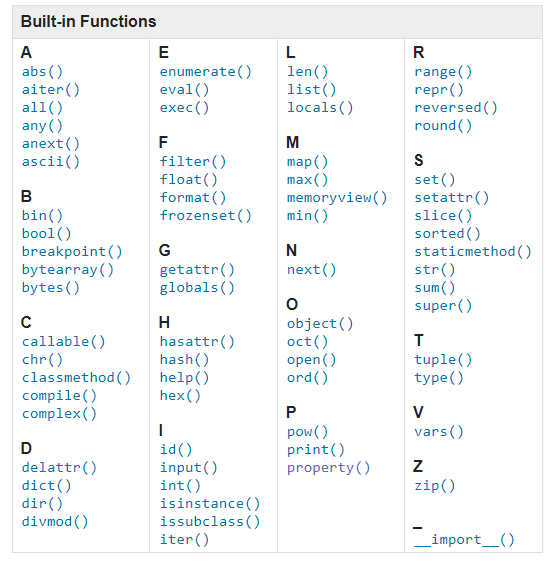

Деякі функції з цього списку вам вже відомі, в даній лекції ми пройдемося по деяким вбудованим функціям, якщо вам цікаво подивитись їх всі з описом та документацією - [лінк](https://docs.python.org/3/library/functions.html)

### Sorted

Ми вже з вами бачили метод типу даних `list` - `list.sort()`, але окремо, існує також `built-int` функція, що може сортувати будь яку послідовність - `str`, `list`, `dict`, e.t.c

In [ ]:
my_list = ['a', '123', 'b', 'da', 'fdf', 'da']
sorted(my_list)

In [ ]:
mystr = "ababagalamaga"
sorted(mystr)

Також, ця функція має два аргументи це `key`, (аналогічно з `key` в `list.sort()`) та `reverse` - булеве значення, якщо `True` - перегортає отриману послідовність.

Аргумент `key`, має бути такою функцією, яка приймає один аргумент, для того, щоб порівняти результат роботи цієї функції на двох елементах. За замовченням - `key` має значення `None`, тобто елементи порівнюються 'прямо'

In [ ]:
my_list = ['a', '123', 'b', 'da', 'fdf', 'da']
sorted(my_list, key=len)

In [ ]:
my_list = ['a', '123', 'b', 'da', 'fdf', 'da']
sorted(my_list, key=len, reverse=True)

Тобто - зверніть увагу, ключем може бути лише функція, яка приймає аргумент. Умовно назвемо цю функцію `fn`, тоді порівняння елементів буде виконуватися завдяки `fn(a) > fn(b)`. Виходячі з цього, ви не можете використовувати функції, що приймають 2 аргументи і більше, наприклад `max`, `min` і так далі.

### Iter

Завдяки цій функції, працюють цикли `for`, функція створює об'єкт `iterable`, до якого можна звертатися, щоб отримати наступний елемент послідовності, тобто:

In [ ]:
my_str = "ababagalamaga"
iter(my_str)

In [ ]:
my_li = [1, 2, 3, 4, 5]
iter(my_li)

In [ ]:
my_set = {1, 2, 3, 4, 5}
iter(my_set)

In [ ]:
my_iter = iter(range(10))

for i in my_iter:
    print(i)

Також, ця функція має аргумент `sentinel` - в першому наближенні, аргументом ітератора може бути функція, яка буде викликатися до тих пір, поки результат її роботи не буде дорівнюватися об'єкту, що був переданий в якості аргумента `sentinel`

In [ ]:
from functools import partial
from random import randint

pull_trigger = partial(randint, 1, 6)

print('Starting a game of Death Roulette...')
print('--------------------------------------')

for i in iter(pull_trigger, 6):
    print('I am still alive, selected', i)

print('Oops, game over, I am dead! :(')

### Next

Також одна із складових функцій для ітерування та створення генераторів (про які пізніше) що вона робить - завдяки цій функції можна отримати наступний елемент з об'єкту `iterable`, тобто

In [ ]:
my_list = iter(list(range(5)))
print(next(my_list))
print(next(my_list))
print(next(my_list))

three = next(my_list)
three

## Filter

Функція `filter` - створена УВАГА (!) для фільтрування. Має два аргументи на вход, та повертає об'єкт `iter`. Аргументами до функції `filter` є послідовність (`str`, `list`, `set`) та функція. Якщо результат роботи даної функції на будь якому елементі послідовності видать `False`, то елемент не буде включений до `iter`, що видає `filter`.

In [ ]:
my_list = [1, 2, 3, 4, 5, 0]
filter(bool, my_list)

In [ ]:
list(filter(bool, my_list))

In [ ]:
def i_hate_fours(x):
    return True if x != 4 else False

my_list = [1, 1, 1, 4, 4, 4]
my_f_result = filter(i_hate_fours, my_list)
list(my_f_result)

### Map

Функція `map` приймає 2 аргументи - функцію та послідовність. До кожного елемента послідовності, застосовується функція. `map` віддає об'єкт, за яким можна ітеруватися. 

In [ ]:
str_list = ["1", "2", "3", "4", "5"]
map(int, str_list)

In [ ]:
list(map(int, str_list))

Проте, запуск функції виконується лише тоді, коли ви хочете 'розпакувати', об'єкт що створила `map`, також це справедливо і для попередніх функцій - `iter`, `filter`, та інших, які працюють на схожому прицнипі (наприклад `functools.reduce`. Тобто в першому наближенні - спочатку створюється об'єкт, який знає 'де взяти', функцію і аргумент до неї, а виконається ця функція лише при умові, якщо ви 'розпакуєте' цей об'єкт будь чим, наприклад циклом.

In [ ]:
def just_a_counter(x):
    print(f"hello with {x}")

my_range = range(5)
map(just_a_counter, my_range)

In [ ]:
for i in map(just_a_counter, my_range):
    print(i)

In [ ]:
my_range = range(5)
list(map(just_a_counter, my_range))

In [ ]:
my_data = [(1, 10), (4, 11), (5, 15)]
def my_fn(x):
    x1, x2 = x
    return x1 ** x2
list(map(my_fn, my_data))

## Aнонимні функції - lambda

Інколи, вам треба зробити `map`, `sort`, `reduce` за допомогою функції, яку ви не плануєте використовувати в майбутньому, для таких цілей (і не тількі) використовується синтаксіс `lambda` функцій, або анонімних функцій.
Це поняття існує не тількі в `python` - проте це поширений термін в математиці на комп'ютерних науках.

Створюються такі об'єкти за допомогою ключового слова `lambda`, пілся якої йдуть аргументи, далі ставиться двокрапка і дії, які мають бути виконані з аргументом.

In [ ]:
lambda x: x**x

In [ ]:
(lambda x: x**x)(2)

В порівнянні зі звичайним створенням функцій

In [ ]:
def foo(x): 
    return x

# also works
def foo(x): return x

lambda x: x

Як це використовувати? Перепишемо функцію `i_hate_fourth` за допомогою `lambda` і отфільтруємо список, який ми фільтрували за допомогою цієї функції.

In [ ]:
my_list = [1, 1, 1, 4, 4, 4]
filtered = filter(lambda x: True if x != 4 else False, my_list)

list(filtered)

Тобто, ми створили функцію, яка ніде не може бути використана далі, проте фільтрація виконалася, а функція не буде займати місце, бо її поглине `garbage collector`. 

Використовуючи анонімні функції, можна передавати ключі, функції для `map`, `filter`, `reduce` і так далі.

In [ ]:
my_list = [1, 4, 1, 4, 1, 4, 1, 4]
my_list.sort(key=lambda x: 10 if x == 1 else 0)

In [ ]:
my_tuple = [(1, 5), (12, 4), (3, 5)]
mapped = map(lambda x: x[0] - x[1] if x[0] > x[1] else x[1] - x[0], my_tuple)
list(mapped)

Також, силка на лямбду може буде додана на любу змінну, проте не робіть так, якщо ви плануєте виокристовувати лямбди таким чином - створіть звичайну функцію

In [ ]:
lambda_fn = lambda x, y, z: x + y + z
lambda_fn(1, 2, 3)

## Генератори - Generators

Генератори - це функції результатом яких є об'єкт [lazy iterators](https://en.wikipedia.org/wiki/Lazy_evaluation). Або той об'єкт - який повертає шось лише за потребою. Синтаксис створення генераторів схожий із сінтаксісом створення функції (бо генератор - це функція). Проте на відміну від функції - за 'віддавання' в нашому випадку виступає не `return`, а `yield`

In [ ]:
def my_gen(x):
    yield x

type(my_gen)

In [ ]:
gen = my_gen(5)
type(gen)

Що робить `yield`? Віддає нам об'єкт за потребою, 'потреба' в нашому випадку є функція `next`, або люба розпаковка - цикл, `*`, або білтин функція що робить розпаковку - `list`, `set` `tuple`, e.t.c.

In [ ]:
next(gen)

Якщо наш генератор вже віддав всі можливі значення - викликається ерор - `StopIteration`:

In [ ]:
next(gen)

In [ ]:
def my_gen_range(x):
    for i in range(x):
        yield i

genrange = my_gen_range(10)

In [ ]:
print('from next')
print(next(genrange))
print(next(genrange))

print('from for')
for i in genrange:
    print(i)

Генератори також можуть бути створені завдяки `generator comprehension`, близько до того, що було з `list comprehension`:

In [ ]:
gen = (i for i in range(10))
gen

In [ ]:
for i in gen:
    print(i)

Поки що, на вашому етапі вивчення пайтону - генератори можуть показатися незрозумілими і непотрібними, проте, це вкрай фундаментальна штука, яка дозволяє оброблювати великі масиви даних, не займаючи пам'ять вашого комп'ютера, завдяки тому, що дані зберігаються в пам'ять лише в момент їх віддачі генератором.

In [ ]:
import sys
print(sys.getsizeof([i for i in range(100000)]), "list size")
print(sys.getsizeof((i for i in range(100000))), "gen size")

Як і з функціями `map`, `filter` - `generator` виконує дії тількі в момент його визова, тобто:

In [ ]:
def somegen_foo(x):
    print(x)
    yield 0

gen = somegen_foo(5)

In [ ]:
next(gen)

In [ ]:
def somegen_foo2(x):
    for i in range(x):
        print("hello, I was used!")
        yield i

In [ ]:
gen = somegen_foo2(7)

next(gen)

In [ ]:
next(gen)

In [ ]:
for i in gen:
    print(f"got a value from gen", i)
    if i == 4:
        break
        
next(gen)

Також, одним із цікавих моментів в викорстанні генераторів є те, що по факту вони преривають своє виконання в момент `yield`, тобто якщо в звичайних функціях код, який стояв після `return` - не виконувався, у випадку `yield` він йде далі.

In [ ]:
def somefn():
    print("before return ")
    return 
    print("after return")

somefn()

In [ ]:
def somegen():
    print('before yield')
    yield
    print('after yield')
    yield
    print('and again after yield')
    yield
    print('you probably understood')
    yield
    
mygen = somegen()

In [ ]:
next(mygen)
next(mygen)
next(mygen)
next(mygen)

Також, генератори мають свої методи, які дозволяють передавання данних в середину генератору, проте про цей метод і його переваги буде в останніх лекціях, які стосуються `async` та асінхронного підходу в цілому.

In [ ]:
def my_gen(x):
    someval = yield x
    print('recevied from outside', someval)
    someval2 = yield x
    print('recevied from outside', someval2)
    yield
    return

genobj = my_gen("Hi")

In [ ]:
next(genobj)

In [ ]:
genobj.send('Sup')

In [ ]:
genobj.send('Foo bar')

## Рекурсії - recursions

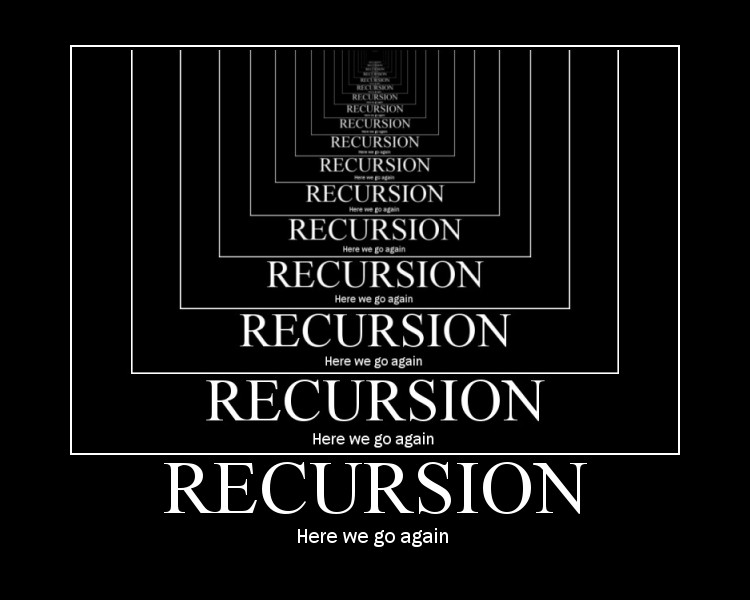

Ви вже знайомі з сінтаксісом функцій, і вам знайомо те, що функції можуть викликати самі себе, проте функції можуть викликати самі себе теж. Коли функція викликає саму себе, вона називається рекурсивною. Це поширене поняття в комп'ютерних науках, і в мові пайтон також можна імплементувати рекурсії.

Традиційно - знайомство з рекурсіями починають з чисел [фібоначчі](https://en.wikipedia.org/wiki/Fibonacci).

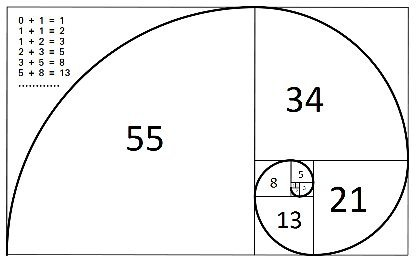

Послідовність Фібоначчі визначається як ряд чисел, в якому кожне наступне число дорівнює сумі двох попередніх, тобто 

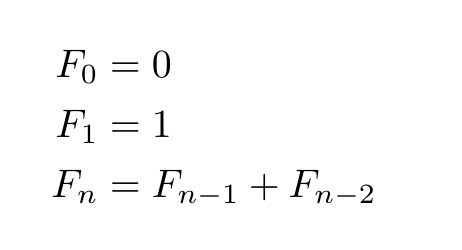

In [170]:
def fib(n):
    
    # recursion base conditions
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:  # recursion call if base conditions wasnt satisfied
        return fib(n - 1) + fib(n - 2)

In [172]:
fib(16)

987

Тобто, кожен раз, коли ви викликаєте функцію `fib(n)`, вона також викликає дві функції - `fib(n - 1)` та `fib(n - 2`, які, в разі якщо не були виконані базові умови, в свою чергу також викликають `fib(n - 1)` та `fib(n - 2)`

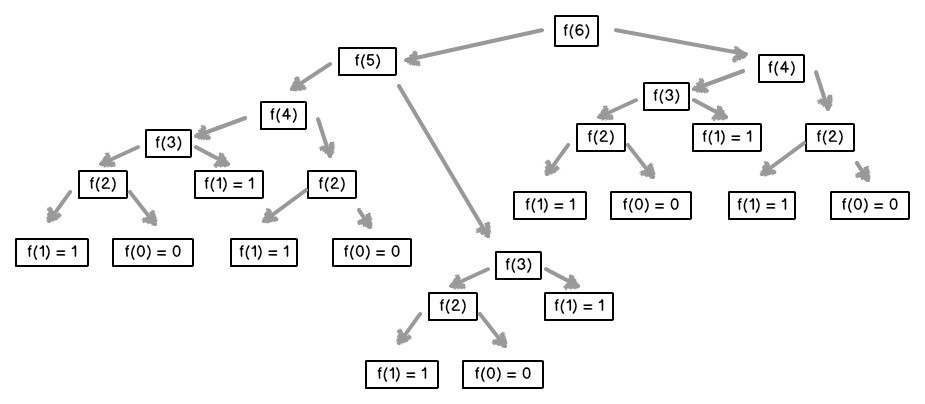

Роздивимося ще один приклад - пошук факторіала.

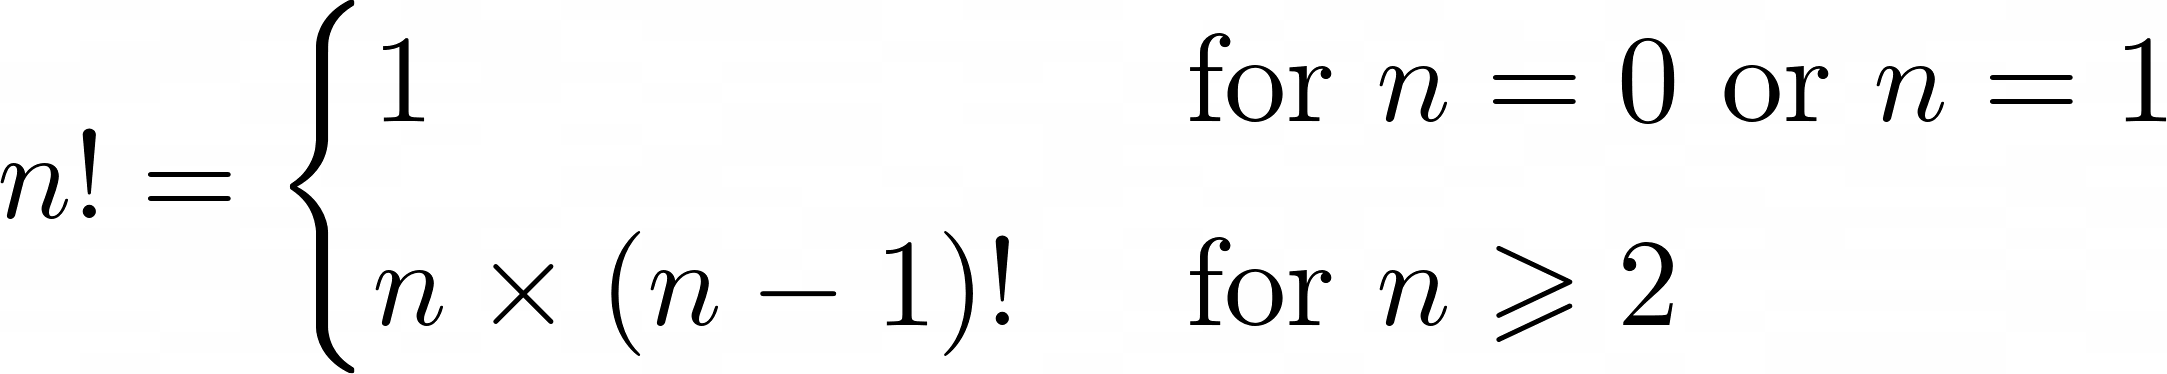

In [173]:
def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)

In [175]:
factorial(4)

24

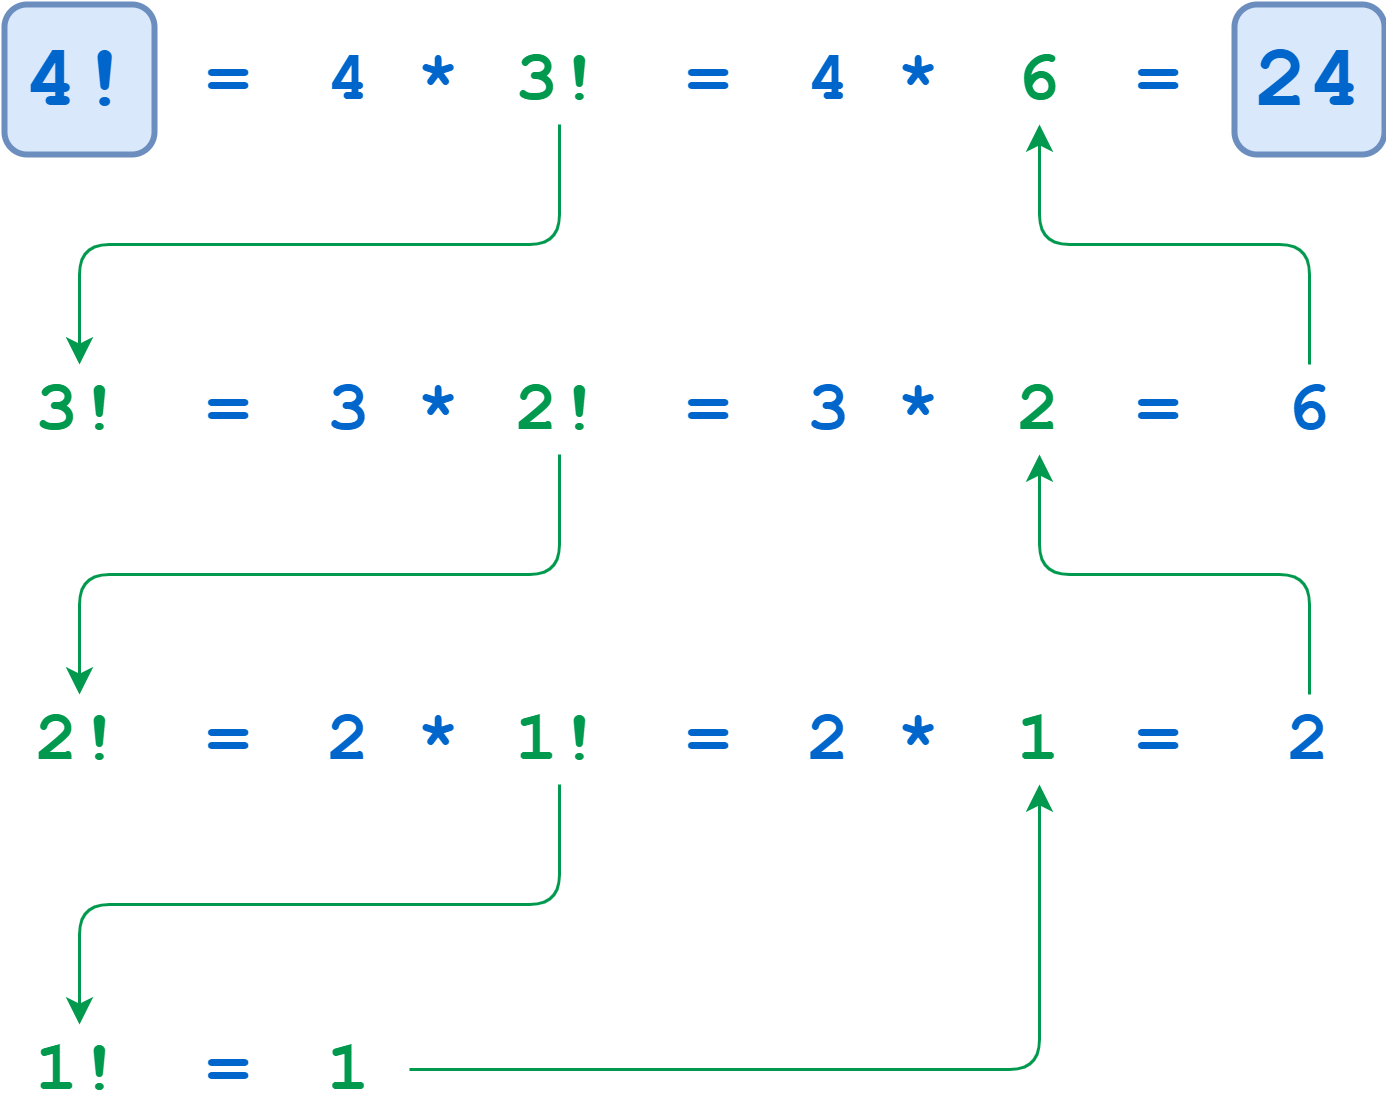

Також, функція, що не має базових кондицій, та викликає рекурсію закономірно може увійти в 'крутоє пікє' і визивати себе до нескінченності, наприклад:

In [ ]:
def foo(x) return foo(x)

В середі `jupyter` це вб'є ваш ноутбук і його прийдеться виконувати заново, проте в стандартному пайтоні - на рекурсивні виклики є ліміт - 1000 викликів, далі, функція перестає працювати.